# Deep Learning for Text Processing (PyTorch + NLTK)

- Explore **deep learning using PyTorch** for:
  - **Text classification**
  - **Text generation**
- Topics covered:
  - **Encoding techniques**
  - **Deep learning models for text**
  - **Transformer architecture**
  - **Model robustness & protection against attacks**
- Real-world applications:
  - Sentiment Analysis
  - Text Summarization
  - Machine Translation

---

## 3. What You Should Know
Before starting, ensure familiarity with:
- **PyTorch basics**: training & evaluation loops
- **CNNs (Convolutional Neural Networks)**
- **RNNs (Recurrent Neural Networks)**

---

## 4. Text Processing Pipeline
Steps in PyTorch text analysis:
1. **Preprocessing**
2. **Encoding**
3. **Dataset & DataLoader**

This section focuses on **Preprocessing**.

---

## 5. Preprocessing
- Goal: **Clean & prepare text data** for encoding.

---

## 6. PyTorch + NLTK
- Use **PyTorch** + **NLTK (Natural Language Toolkit)** for preprocessing.
- NLTK provides a wide range of **text transformation techniques**.

---

## 7. Preprocessing Techniques
We will cover:
- **Tokenization**
- **Stopword Removal**
- **Stemming**
- **Rare Word Removal**

---

## 8. Tokenization
- Splits text into **tokens** (words, subwords, punctuation).
- PyTorch provides `get_tokenizer` from `torchtext.data.utils`.

### Example:
```
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")
sentence = "I am reading a book now. I love to read books!"
tokens = tokenizer(sentence)
print(tokens)

```
~ Output: ['i', 'am', 'reading', 'a', 'book', 'now', '.', 'i', 'love', 'to', 'read', 'books', '!']

### 9. Stopword Removal
Removes common words (e.g., a, the, and, or) that add little meaning.

Use NLTK stopwords corpus.

Example:

```
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

filtered_tokens = [w for w in tokens if w.lower() not in stop_words]
print(filtered_tokens)
```
~ Output: ['reading', 'book', 'love', 'read', 'books']

### 10. Stemming
Reduces words to their root form.

Example: running, runs, ran -> run

Use PorterStemmer from NLTK.

Example:
```
python
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(w) for w in filtered_tokens]
print(stemmed_tokens)
```
~ Output: ['read', 'book', 'love', 'read', 'book']

11. Rare Word Removal
Removes infrequent words that add little value.

Use FreqDist from nltk.probability.

Example:
```
from nltk.probability import FreqDist

freq_dist = FreqDist(stemmed_tokens)
threshold = 2
final_tokens = [w for w in stemmed_tokens if freq_dist[w] > threshold]
print(final_tokens)
```

~ Output: ['read', 'book']
### 12. Summary of Preprocessing Techniques
Tokenization -> Break text into tokens

Stopword Removal -> Remove common meaningless words

Stemming -> Reduce words to root form

Rare Word Removal -> Filter out infrequent words

These techniques:

Reduce feature space

Create cleaner datasets

Improve model performance

In [ ]:
# Import the necessary functions
from torchtext.data.utils import get_tokenizer
from nltk.probability import FreqDist

text = "In the city of Dataville, a data analyst named Alex explores hidden insights within vast data. With determination, Alex uncovers patterns, cleanses the data, and unlocks innovation. Join this adventure to unleash the power of data-driven decisions."

# Initialize the tokenizer and tokenize the text
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(text)

threshold = 1
# Remove rare words and print common tokens
freq_dist = FreqDist(tokens)
common_tokens = [token for token in tokens if freq_dist[token] > threshold]
print(common_tokens)

In [ ]:
import nltk
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
# Initialize and tokenize the text
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(text)

# Remove any stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

# Perform stemming on the filtered tokens
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
print(stemmed_tokens)

# Encoding Text Data (PyTorch + Scikit-learn)

## 1. Encoding Text Data
Welcome back. Let's encode our text.

---

## 2. Text Encoding
- Encoding happens **after preprocessing**.
- Converts text into **machine-readable numbers** for analysis and modeling.
- Example: Each word in a table (red) is mapped to its encoded representation (blue).

---

## 3. Encoding Techniques
We will cover:
- **One-hot encoding** -> unique binary representation for each word
- **Bag-of-Words (BoW)** -> captures word frequency, ignores order
- **TF-IDF (Term Frequency-Inverse Document Frequency)** -> balances uniqueness and importance of words
- **Embeddings** -> represent semantic meaning (covered in next chapter)

---

## 4. One-hot Encoding
- Each word maps to a distinct **binary vector**.
- Example vocabulary: `["cat", "dog", "rabbit"]`
  - "cat" -> [1, 0, 0]
  - "dog" -> [0, 1, 0]
  - "rabbit" -> [0, 0, 1]

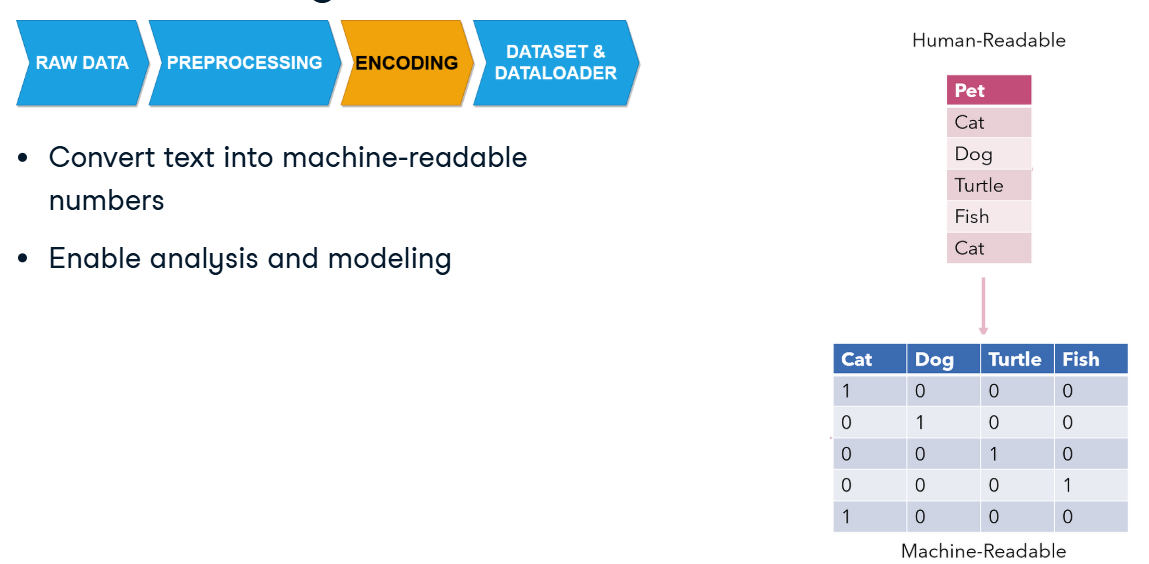
---

## 5. One-hot Encoding with PyTorch
```
import torch
from torchtext.data.utils import get_tokenizer

# Tokenize sentence
tokenizer = get_tokenizer("basic_english")
sentence = "The cat sat on the mat"
tokens = tokenizer(sentence)

# Build vocabulary
vocab = list(set(tokens))
vocab_size = len(vocab)

# Generate one-hot vectors
one_hot_vectors = torch.eye(vocab_size)

# Map words to vectors
one_hot_dict = {word: one_hot_vectors[i] for i, word in enumerate(vocab)}

print("Vocabulary:", vocab)
print("One-hot for 'cat':", one_hot_dict["cat"])
6. Bag-of-Words (BoW)
Represents a document as an unordered collection of words.

Focuses on word frequency.

Example: "The cat sat on the mat"

Dictionary: {"the": 2, "cat": 1, "sat": 1, "on": 1, "mat": 1}
```

---

# 7. Bag-of-Words with CountVectorizer

```
from sklearn.feature_extraction.text import CountVectorizer

# Define corpus (list of documents)
corpus = [
    "The cat sat on the mat",
    "The dog barked loudly",
    "The rabbit hopped quickly"
]

# Initialize vectorizer
vectorizer = CountVectorizer()

# Fit and transform corpus
X = vectorizer.fit_transform(corpus)

# Convert to array
print(X.toarray())

# Feature names (vocabulary)
print(vectorizer.get_feature_names_out())
Output: Term frequency matrix
```

Rows -> documents

Columns -> words

Values -> frequency counts
---

# 8. TF-IDF (Term Frequency-Inverse Document Frequency)
Assigns importance scores to words:

Higher for rare words

Lower for common words

Improves over Bag-of-Words by emphasizing informative words.
---
# 9. TF-IDF with TfidfVectorizer
```
from sklearn.feature_extraction.text import TfidfVectorizer

# Same corpus as before
corpus = [
    "The cat sat on the mat",
    "The dog barked loudly",
    "The rabbit hopped quickly"
]

# Initialize vectorizer
tfidf = TfidfVectorizer()

# Fit and transform corpus
X = tfidf.fit_transform(corpus)

# Convert to array
print(X.toarray())

# Feature names
print(tfidf.get_feature_names_out())
Output: TF-IDF matrix
```

Rows -> documents

Columns -> words

Values -> TF-IDF scores

Example:

Word "first" may have highest importance in the first sentence with score ≈ 0.68.

---
# 10. Summary of Encoding Techniques
One-hot encoding -> simple, unique binary vectors

Bag-of-Words -> frequency-based representation

TF-IDF -> frequency + importance weighting

Embeddings -> semantic meaning (covered next)

In [5]:
genres = ['Fiction','Non-fiction','Biography', 'Children','Mystery']

# Define the size of the vocabulary
vocab_size = len(genres)

# Create one-hot vectors
one_hot_vectors = torch.eye(vocab_size)

# Create a dictionary mapping genres to their one-hot vectors
one_hot_dict = {genre: one_hot_vectors[i] for i, genre in enumerate(genres)}

for genre, vector in one_hot_dict.items():
    print(f'{genre}: {vector.numpy()}')

Fiction: [1. 0. 0. 0. 0.]
Non-fiction: [0. 1. 0. 0. 0.]
Biography: [0. 0. 1. 0. 0.]
Children: [0. 0. 0. 1. 0.]
Mystery: [0. 0. 0. 0. 1.]


# above is a basic kind o one hot vectoprization if we have multi class columln like genres category severity and more

In [59]:
# Import from sklearn
from sklearn.feature_extraction.text import CountVectorizer

titles = ['The Great Gatsby','To Kill a Mockingbird','1984','The Catcher in the Rye','The Hobbit', 'Great Expectations']

# Initialize Bag-of-words with the list of book titles
vectorizer = CountVectorizer()
bow_encoded_titles = vectorizer.fit_transform(titles)

# Extract and print the first five features
print(vectorizer.get_feature_names_out())
print(bow_encoded_titles.toarray())

['1984' 'catcher' 'expectations' 'gatsby' 'great' 'hobbit' 'in' 'kill'
 'mockingbird' 'rye' 'the' 'to']
[[0 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 1 2 0]
 [0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 0 0]]


 #The output matrix provides a clear picture of the word frequencies in the book titles. By analyzing the output, you can identify the frequency of words like 'catcher' and 'great' in the titles. The word frequency feature vectors can be used later by machine learning algorithms.

In [24]:
# Importing TF-IDF from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

description = '''
    THE SONNETS
    ALL’S WELL THAT ENDS WELL
    THE TRAGEDY OF ANTONY AND CLEOPATRA
    AS YOU LIKE IT
    THE COMEDY OF ERRORS
    THE TRAGEDY OF CORIOLANUS
    CYMBELINE
    THE TRAGEDY OF HAMLET, PRINCE OF DENMARK
    THE FIRST PART OF KING HENRY THE FOURTH
    THE SECOND PART OF KING HENRY THE FOURTH
    THE LIFE OF KING HENRY THE FIFTH
    THE FIRST PART OF HENRY THE SIXTH
    THE SECOND PART OF KING HENRY THE SIXTH
    THE THIRD PART OF KING HENRY THE SIXTH
    KING HENRY THE EIGHTH
    THE LIFE AND DEATH OF KING JOHN
    THE TRAGEDY OF JULIUS CAESAR
    THE TRAGEDY OF KING LEAR
    LOVE’S LABOUR’S LOST
    THE TRAGEDY OF MACBETH
    MEASURE FOR MEASURE
    THE MERCHANT OF VENICE
    THE MERRY WIVES OF WINDSOR
    A MIDSUMMER NIGHT’S DREAM
    MUCH ADO ABOUT NOTHING
    THE TRAGEDY OF OTHELLO, THE MOOR OF VENICE
    PERICLES, PRINCE OF TYRE
    KING RICHARD THE SECOND
    KING RICHARD THE THIRD
    THE TRAGEDY OF ROMEO AND JULIET
    THE TAMING OF THE SHREW
    THE TEMPEST
    THE LIFE OF TIMON OF ATHENS
    THE TRAGEDY OF TITUS ANDRONICUS
    TROILUS AND CRESSIDA
    TWELFTH NIGHT; OR, WHAT YOU WILL
    THE TWO GENTLEMEN OF VERONA
    THE TWO NOBLE KINSMEN
    THE WINTER’S TALE
    A LOVER’S COMPLAINT
    THE PASSIONATE PILGRIM
    THE PHOENIX AND THE TURTLE
    THE RAPE OF LUCRECE
    VENUS AND ADONIS




THE SONNETS

                    1

From fairest creatures we desire increase,
That thereby beauty’s rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed’st thy light’s flame with self-substantial fuel,
Making a famine where abundance lies,
Thyself thy foe, to thy sweet self too cruel:
Thou that art now the world’s fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak’st waste in niggarding:
  Pity the world, or else this glutton be,
  To eat the world’s due, by the grave and thee.


                    2

When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty’s field,
Thy youth’s proud livery so gazed on now,
Will be a tattered weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv’d thy beauty’s use,
If thou couldst answer ‘This fair child of mine
Shall sum my count, and make my old excuse,’
Proving his beauty by succession thine.
  This were to be new made when thou art old,
  And see thy blood warm when thou feel’st it cold.

'''

descriptions = [line.strip() for line in description.split("\n") if line.strip()]
# Initialize TF-IDF encoding vectorizer


vectorizer = TfidfVectorizer()
tfidf_encoded_descriptions = vectorizer.fit_transform(descriptions)

# Extract and print the first five features
print(vectorizer.get_feature_names_out())
print(tfidf_encoded_descriptions)


['about' 'abundance' 'ado' 'adonis' 'all' 'an' 'and' 'andronicus' 'answer'
 'antony' 'art' 'as' 'asked' 'athens' 'be' 'bear' 'beauty' 'being'
 'besiege' 'blood' 'bright' 'brow' 'bud' 'buriest' 'but' 'by' 'caesar'
 'child' 'churl' 'cleopatra' 'cold' 'comedy' 'complaint' 'content'
 'contracted' 'coriolanus' 'couldst' 'count' 'creatures' 'cressida'
 'cruel' 'cymbeline' 'days' 'death' 'decease' 'deep' 'denmark' 'deserv'
 'desire' 'die' 'dig' 'dream' 'due' 'eat' 'eating' 'eighth' 'else' 'ends'
 'errors' 'excuse' 'eyes' 'fair' 'fairest' 'famine' 'feed' 'feel' 'field'
 'fifth' 'first' 'flame' 'foe' 'for' 'forty' 'fourth' 'fresh' 'from'
 'fuel' 'gaudy' 'gazed' 'gentlemen' 'glutton' 'grave' 'hamlet' 'heir'
 'held' 'henry' 'herald' 'his' 'how' 'if' 'in' 'increase' 'it' 'john'
 'juliet' 'julius' 'king' 'kinsmen' 'labour' 'lear' 'lies' 'life' 'light'
 'like' 'livery' 'lost' 'love' 'lover' 'lucrece' 'lusty' 'macbeth' 'made'
 'mak' 'make' 'making' 'measure' 'memory' 'merchant' 'merry' 'midsummer'
 '

# ! By examining the feature names and their corresponding TF-IDF values, you can uncover significant words that contribute to the uniqueness and relevance of each book. Your team is excited about the insights gained from your analysis.

# Text Processing Pipeline Recap 

## 2. Recap: Preprocessing
- First pipeline component: **Preprocessing**
- Techniques:
  - **Tokenization**
  - **Stopword Removal**
  - **Stemming**
  - **Rare Word Removal**
- Purpose: reduce complexity of models by cleaning and simplifying text data.

---

## 3. Encoding
- Second pipeline component: **Encoding**
- Converts preprocessed text into **numerical vectors**.
- Methods:
  - **One-Hot Encoding**
  - **Bag-of-Words**
  - **TF-IDF**
  - **Embeddings** (covered in next chapter)
- Enables models to understand and process textual data.

---

## 4. Dataset and DataLoader
- Third pipeline component: **Dataset + DataLoader**
- **Dataset** -> container for processed and encoded text data
- **DataLoader** -> iterates over dataset in batches, shuffles data, applies multiprocessing for efficient loading

---

## 5. Implementing Dataset and DataLoader
Define a custom dataset class:

```
import torch
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, data):
        self.data = data  # encoded text data

    def __len__(self):
        return len(self.data)  # total samples

    def __getitem__(self, idx):
        return self.data[idx]  # access sample by index
```        
# 6. Integrating Dataset and DataLoader
# Example encoded text data
```
encoded_text = [[1, 0, 2], [0, 1, 1]]

# Instantiate dataset
dataset = TextDataset(encoded_text)

# Create DataLoader
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Iterate over batches
for batch in dataloader:
    print(batch)
```

# 7. Helper Functions
preprocess_sentences -> applies preprocessing techniques (tokenization, stopword removal, stemming, rare word removal)

encode_sentences -> converts cleaned sentences into arrays (using CountVectorizer)

extract_sentences -> uses regex to split text into sentences

Example:
```
import re
from sklearn.feature_extraction.text import CountVectorizer

def extract_sentences(text):
    # Regex to split text into sentences
    return re.split(r'(?<=[.!?]) +', text)

def preprocess_sentences(sentences):
    # Placeholder: apply tokenization, stopword removal, stemming, etc.
    return [s.lower() for s in sentences]

def preprocess_sentences(sentences):
    processed_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        tokens = tokenizer(sentence)
        tokens = [token for token in tokens if token not in stop_words]
        tokens = [stemmer.stem(token) for token in tokens]
        freq_dist = FreqDist(tokens)
        threshold = 2
        tokens = [token for token in tokens if freq_dist[token] > threshold]
        processed_sentences.append(' '.join(tokens))
    return processed_sentences

```

# 8. Constructing the Text Processing Pipeline
```
def text_processing_pipeline(raw_text):
    # Step 1: Preprocess
    sentences = preprocess_sentences(extract_sentences(raw_text))

    # Step 2: Encode
    encoded, vectorizer = encode_sentences(sentences)

    # Step 3: Dataset + DataLoader
    dataset = TextDataset(encoded)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

    return dataloader, vectorizer
```

#  9. Applying the Pipeline
```
raw_texts = [
    "This is the first text data",
    "And here is another one"
]

# Apply pipeline to each sentence
dataloaders = [text_processing_pipeline(text)[0] for text in raw_texts]
vectorizers = [text_processing_pipeline(text)[1] for text in raw_texts]

# Access batches
for dataloader in dataloaders:
    batch = next(iter(dataloader))
    print(batch[:10])  # first 10 components of first batch
```

Output: encoded representation of sentences showing frequency of first words in vocabulary.

10. Wrap-Up
The text processing pipeline efficiently converts raw text into machine-learning-ready format.

Steps:

Preprocess text

Encode into numerical vectors

Organize with Dataset

Iterate with DataLoader

Resulting structured data can be used to train, validate, and test models.

This pipeline will be applied to large datasets in upcoming chapters.

In [55]:
# Install required packages (if not already installed)

# Download NLTK stopwords + tokenizer models
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download("punkt_tab", quiet=True)

# Imports
import torch
from torch.utils.data import DataLoader, Dataset
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize   # ← REPLACED torchtext tokenizer


In [40]:
# Initialize tokenizer and stemmer
def basic_english_tokenizer(text):
    return word_tokenize(text.lower())

tokenizer = basic_english_tokenizer
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))


In [45]:

with open("shakespeare.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()


# Split into sentences (basic split for demo)
raw_texts = [line.strip() for line in raw_text.split("\n") if line.strip()]


In [46]:
def processing_pipeline(text):
    text = text.lower()
    tokens = tokenizer(text)
    tokens = [token for token in tokens if token.isalpha()]  # remove punctuation
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens, ' '.join(tokens)


In [47]:
processed_texts = [processing_pipeline(text)[1] for text in raw_texts]

print("Processed samples:")
for line in processed_texts[:3]:
    print("-", line)


Processed samples:
- project gutenberg ebook complet work william shakespear william shakespear
- ebook use anyon anywher unit state
- part world cost almost restrict


In [48]:
class ShakespeareDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

dataset = ShakespeareDataset(processed_texts)
dataloaders = [DataLoader(dataset, batch_size=4, shuffle=True)]


In [49]:
for dataloader in dataloaders:
    batch = next(iter(dataloader))
    print("First batch:")
    for line in batch[:10]:
        print("-", line)


First batch:
- boy good plot laid revolt
- speak
- come lord deni
- shall sorri nobl godfath never ear


# nltk.download('punkt') and 'punkt_tab'
punkt: NLTK’s pretrained sentence tokenizer model (used by word_tokenize)

punkt_tab: Internal lookup table for punkt; required in newer NLTK versions

Without these, word_tokenize() throws a LookupError

# word_tokenize(text)
Splits a string into words and punctuation tokens

Example: "Hello, world!" → ['Hello', ',', 'world', '!']

You later filter out punctuation using token.isalpha()

# raw_texts = [line.strip() for line in raw_text.split("\n") if line.strip()]
Reads the Shakespeare text file line-by-line

Removes empty lines and trims whitespace

Result: a list of clean, non-empty lines (each treated as a sentence/document)

# tokens = tokenizer(text)
Applies your custom tokenizer (word_tokenize + lowercase)

Converts text into a list of lowercase word tokens

# tokens = [token for token in tokens if token.isalpha()]
Removes punctuation and numbers

Keeps only alphabetic words like "love", "death", "king"

# tokens = [token for token in tokens if token not in stop_words]
Removes common English stopwords like "the", "and", "is"

Keeps only meaningful content words

# tokens = [stemmer.stem(token) for token in tokens]
Applies stemming (e.g., "running" → "run")

Reduces words to their root form for better matching

# return tokens, ' '.join(tokens)
Returns:

tokens: list of cleaned words

' '.join(tokens): single string of those words, space-separated

join() converts ['love', 'death'] → "love death"

# processed_texts = [processing_pipeline(text)[1] for text in raw_texts]
Applies the pipeline to each line

Collects only the joined string version (not the token list)

# for line in processed_texts[:3]: print("-", line)
Prints the first 3 processed lines

line is a cleaned, stemmed, stopword-free version of each original sentence

# batch = next(iter(dataloader))
Gets the first batch from the dataloader

A batch is a group of processed lines (e.g., 4 or 8 at a time)

# for line in batch[:10]: print("-", line)
Prints the first 10 items in the batch

Each line is a preprocessed string (like "love death king")

In [63]:

with open("shakespeare.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# Split into sentences (basic split for demo)
raw_texts = [line.strip() for line in raw_text.split("\n") if line.strip()]

# This is what you should pass into the pipeline
processed_shakespeare = raw_texts



In [64]:
# Define your Dataset class
class ShakespeareDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

# Encoding function
def encode_sentences(sentences):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    return X.toarray(), vectorizer



In [65]:
# Text processing pipeline
def text_processing_pipeline(sentences):
    # Step 1: preprocess
    processed_sentences = preprocess_sentences(sentences)
    
    # Step 2: encode
    encoded_sentences, vectorizer = encode_sentences(processed_sentences)
    
    # Step 3: dataset + dataloader
    dataset = ShakespeareDataset(encoded_sentences)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
    
    return dataloader, vectorizer

# Run pipeline
dataloader, vectorizer = text_processing_pipeline(processed_shakespeare)

# Print vocabulary and first batch
print(vectorizer.get_feature_names_out()[:10]) 
print(next(iter(dataloader))[0, :10])


MemoryError: Unable to allocate 17.2 GiB for an array with shape (148752, 15483) and data type int64

In [ ]:
print(vectorizer.get_feature_names_out()) 
print(next(iter(dataloader)))